In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Step 1

In [119]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
train.shape

(1460, 81)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
train.drop(['Id'],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [123]:
train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [124]:
nullCols = [feature for feature in train.columns if train[feature].isna().sum()>0]
nullCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [125]:
# %of missing values

trainNullCount = train.isna().sum()
trainNullPer = np.round(100*train.isna().sum()/train.shape[0],2)

trainNullDf = pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDf.columns = ['trainNullCount','trainNullPer']
trainNullDf.sort_values(by='trainNullCount',ascending=False,inplace=True)
trainNullDf.reset_index(inplace=True)
trainNullDf


,index,trainNullCount,trainNullPer
0,PoolQC,1453.0,99.52
1,MiscFeature,1406.0,96.30
2,Alley,1369.0,93.77
3,Fence,1179.0,80.75
4,FireplaceQu,690.0,47.26
5,LotFrontage,259.0,17.74
6,GarageYrBlt,81.0,5.55
7,GarageCond,81.0,5.55
8,GarageType,81.0,5.55
9,GarageFinish,81.0,5.55


In [126]:
# drop cols with >30% missing vals
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


trainNullCount = train.isna().sum()
trainNullPer = np.round(100*train.isna().sum()/train.shape[0],2)
trainNullDf = pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDf.columns = ['trainNullCount','trainNullPer']
trainNullDf.sort_values(by='trainNullCount',ascending=False,inplace=True)
trainNullDf.reset_index(inplace=True)
trainNullDf

,index,trainNullCount,trainNullPer
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [127]:
# nullCols
nullColumns = np.array(trainNullDf[:14]['index'])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [128]:
# missing val imputation



# train['LotFrontage'].dtype
train['GarageType'].dtype


dtype('O')

In [129]:
for column in nullColumns:
    if train[column].dtype == 'O':# or 'object'
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        train[column].fillna(train[column].median(),inplace=True)


In [130]:
trainNullCount = train.isna().sum()
trainNullPer = np.round(100*train.isna().sum()/train.shape[0],2)
trainNullDf = pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDf.columns = ['trainNullCount','trainNullPer']
trainNullDf.sort_values(by='trainNullCount',ascending=False,inplace=True)
trainNullDf.reset_index(inplace=True)
trainNullDf.head(2)

,index,trainNullCount,trainNullPer
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0


In [131]:
# plotting


numericalCol = train.select_dtypes(include=np.number).columns
numericalCol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [132]:
objectlCol = train.select_dtypes(include=object).columns
objectlCol

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

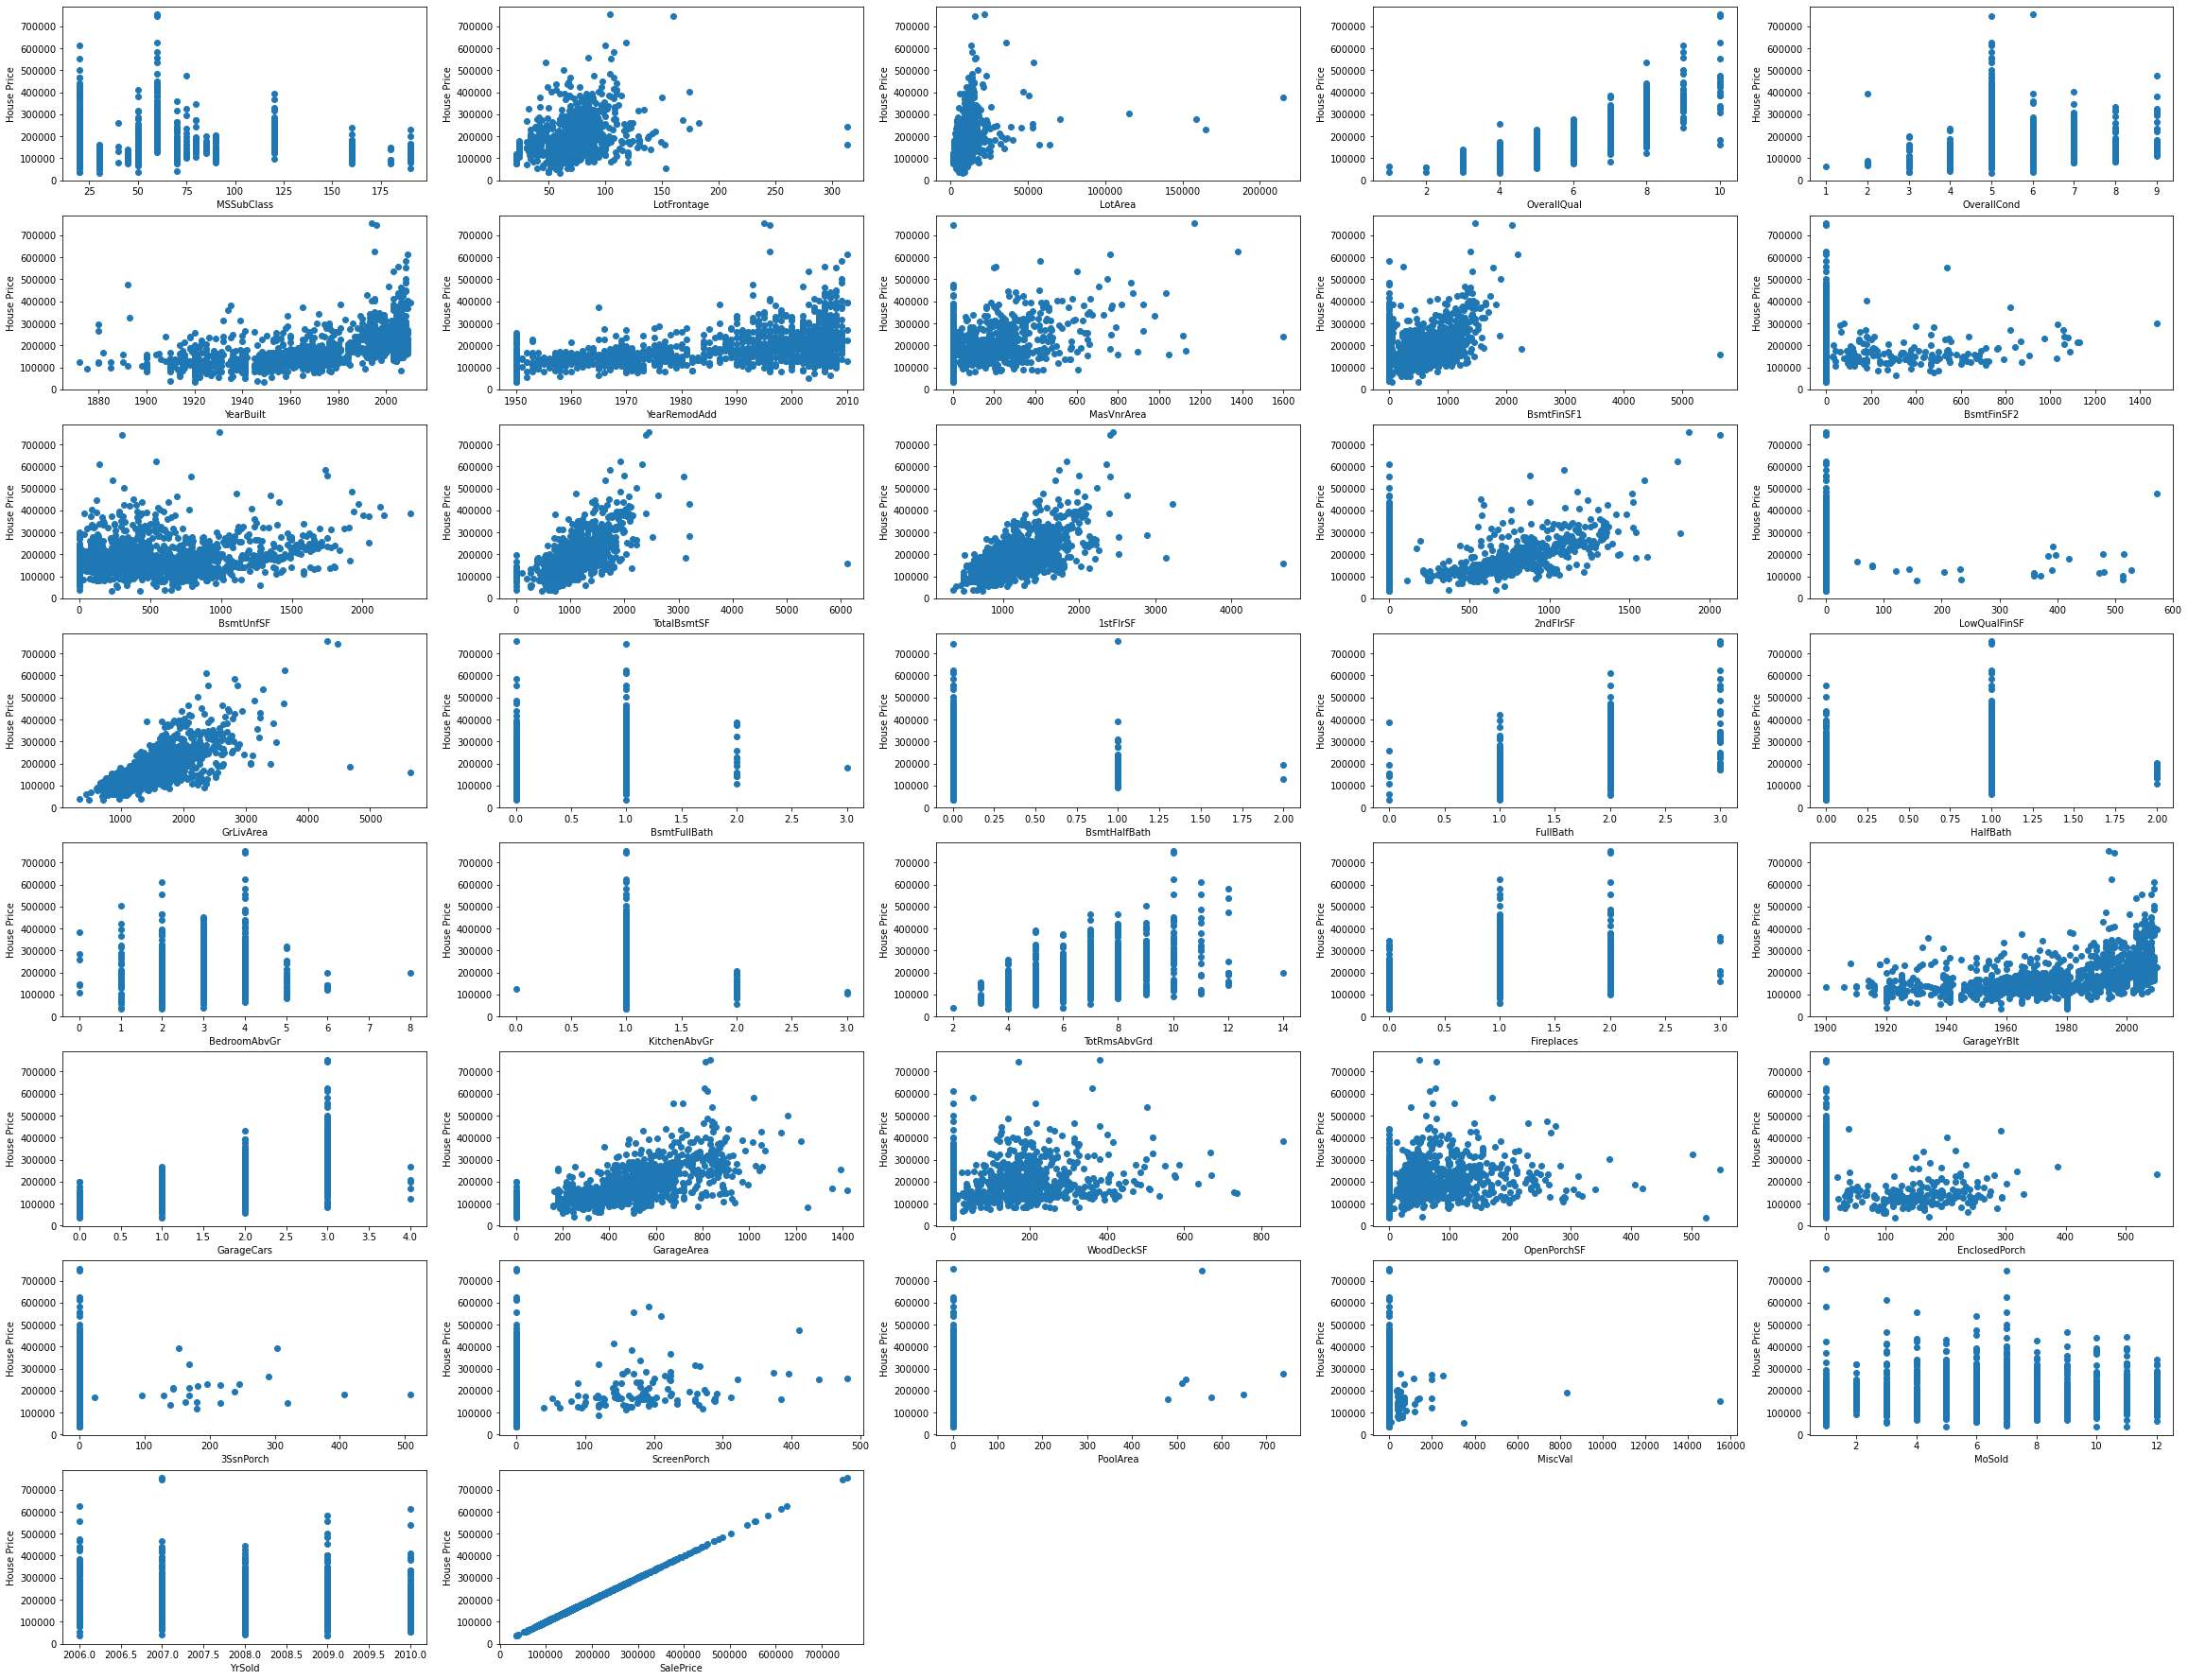

In [133]:
j=1
plt.figure(figsize=(40,40))
for column in numericalCol:
    plt.subplot(10,5,j)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('House Price')    
    j+=1

In [134]:
# we can identify discrete and cont numerical datas from this plot
discreteCols =[]
contCols =[]
# taking if uniques in a col <20 is discrete

for i in numericalCol:
    if train[i].nunique()> 20:
        contCols.append(i)
    else:
        discreteCols.append(i)


contCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [135]:
pd.DataFrame(contCols).nunique()

0    21
dtype: int64

In [136]:
discreteCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [137]:
pd.DataFrame(discreteCols).nunique()

0    16
dtype: int64

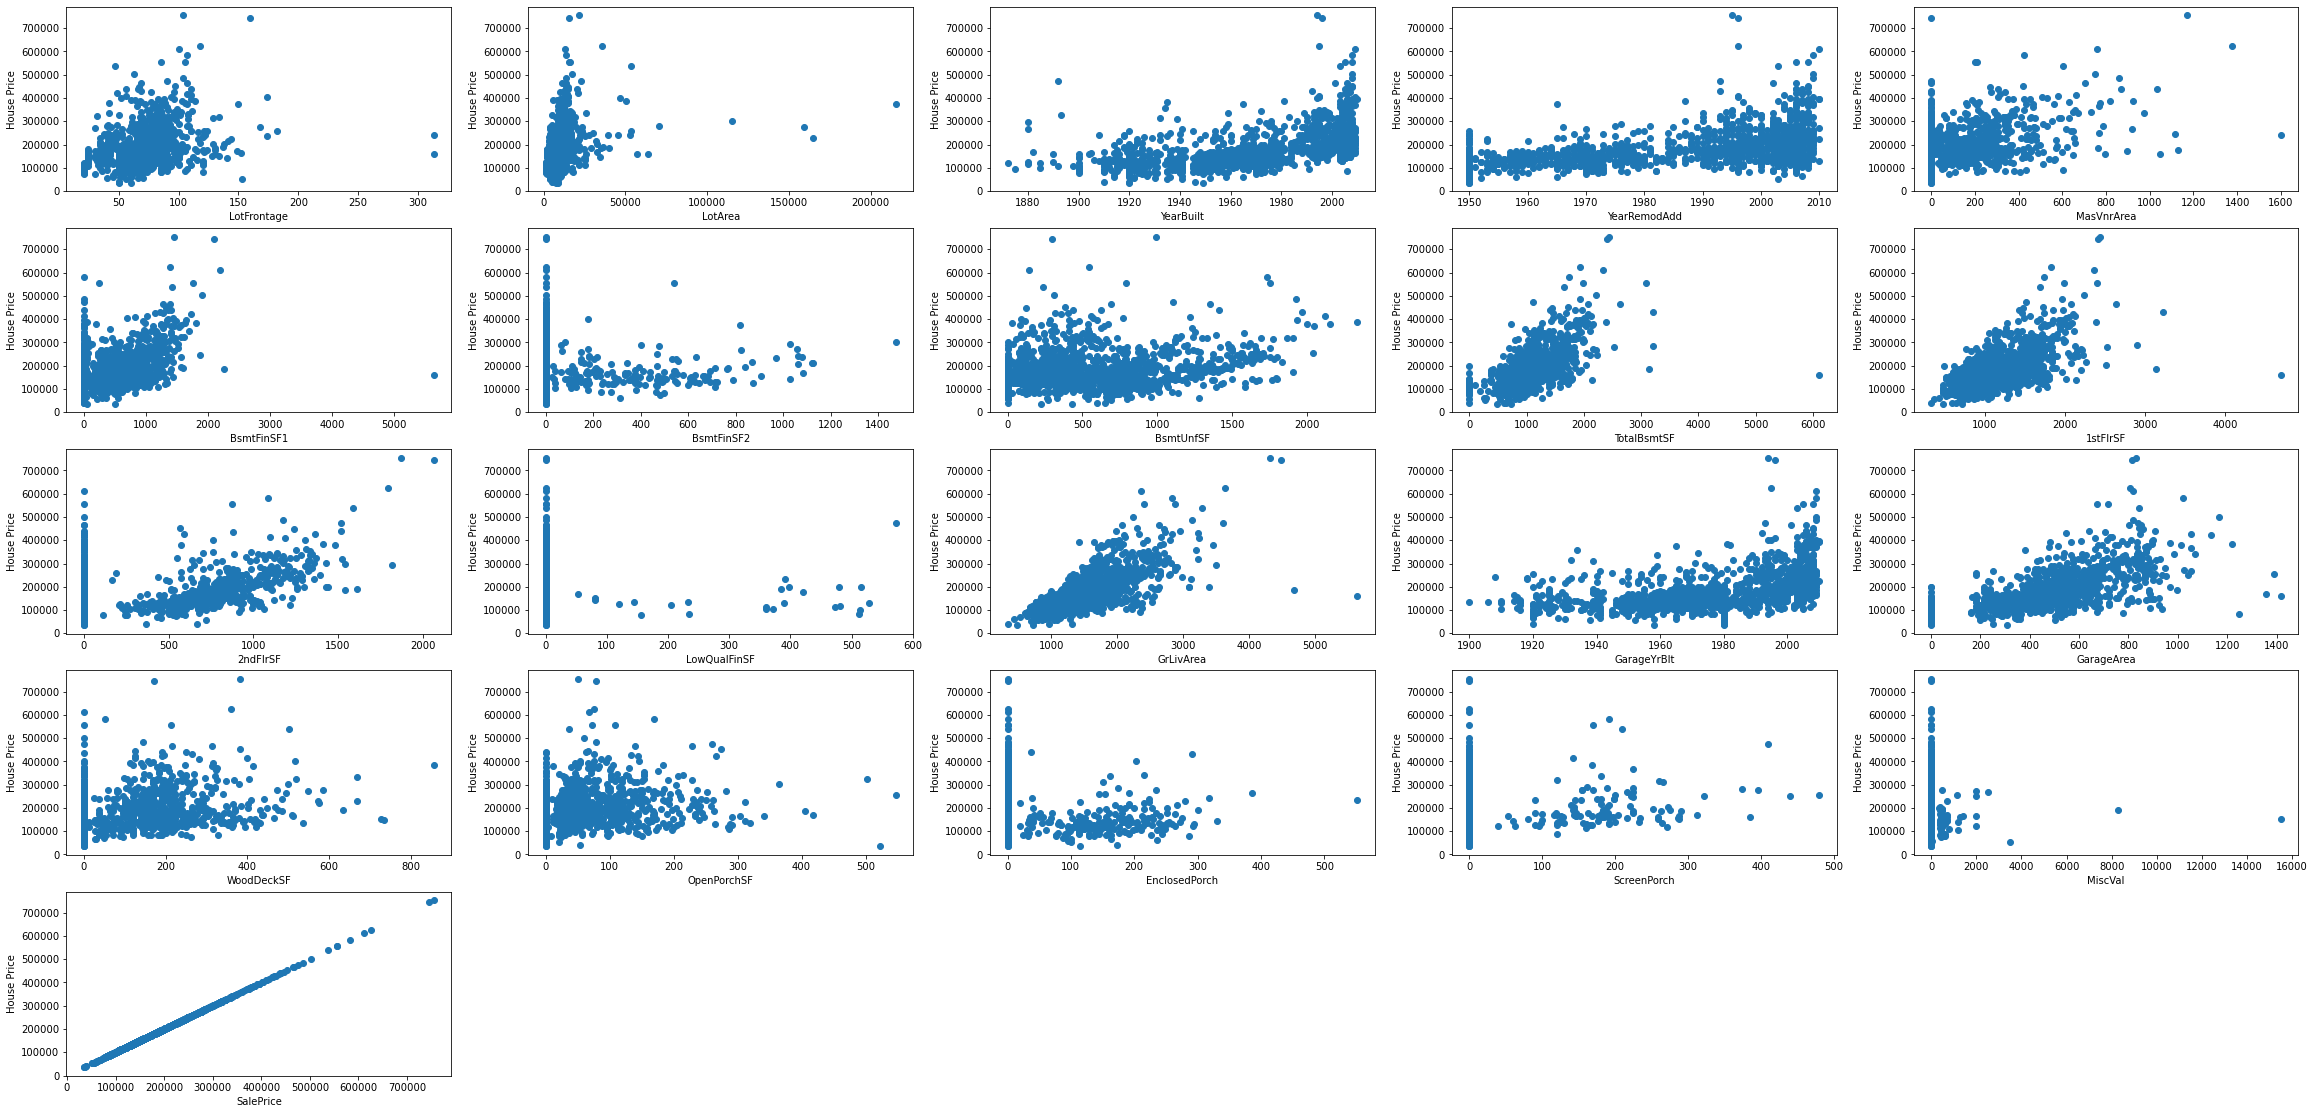

In [138]:
j=1
plt.figure(figsize=(40,40))
for column in contCols:
    plt.subplot(10,5,j)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('House Price')    
    j+=1

discrete data is better to be plotted as barcharts

In [139]:
observationVal = train.groupby('MSSubClass')['SalePrice'].mean()
observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending =False)
observationValDF.reset_index(inplace=True)
observationValDF

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


<BarContainer object of 15 artists>

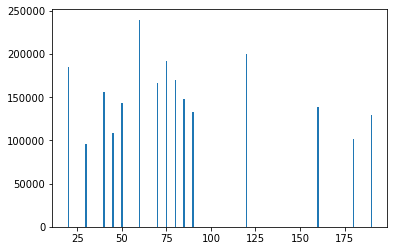

In [140]:
plt.bar(observationValDF['MSSubClass'],observationValDF['SalePrice'])

<BarContainer object of 10 artists>

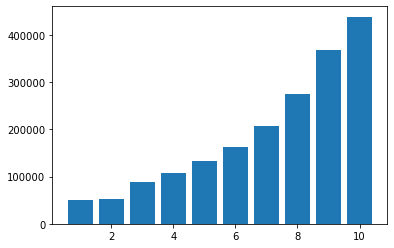

In [141]:
observationVal = train.groupby('OverallQual')['SalePrice'].mean()
observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending =False)
observationValDF.reset_index(inplace=True)
plt.bar(observationValDF['OverallQual'],observationValDF['SalePrice'])

In [142]:
train['OverallQual'].nunique()

10

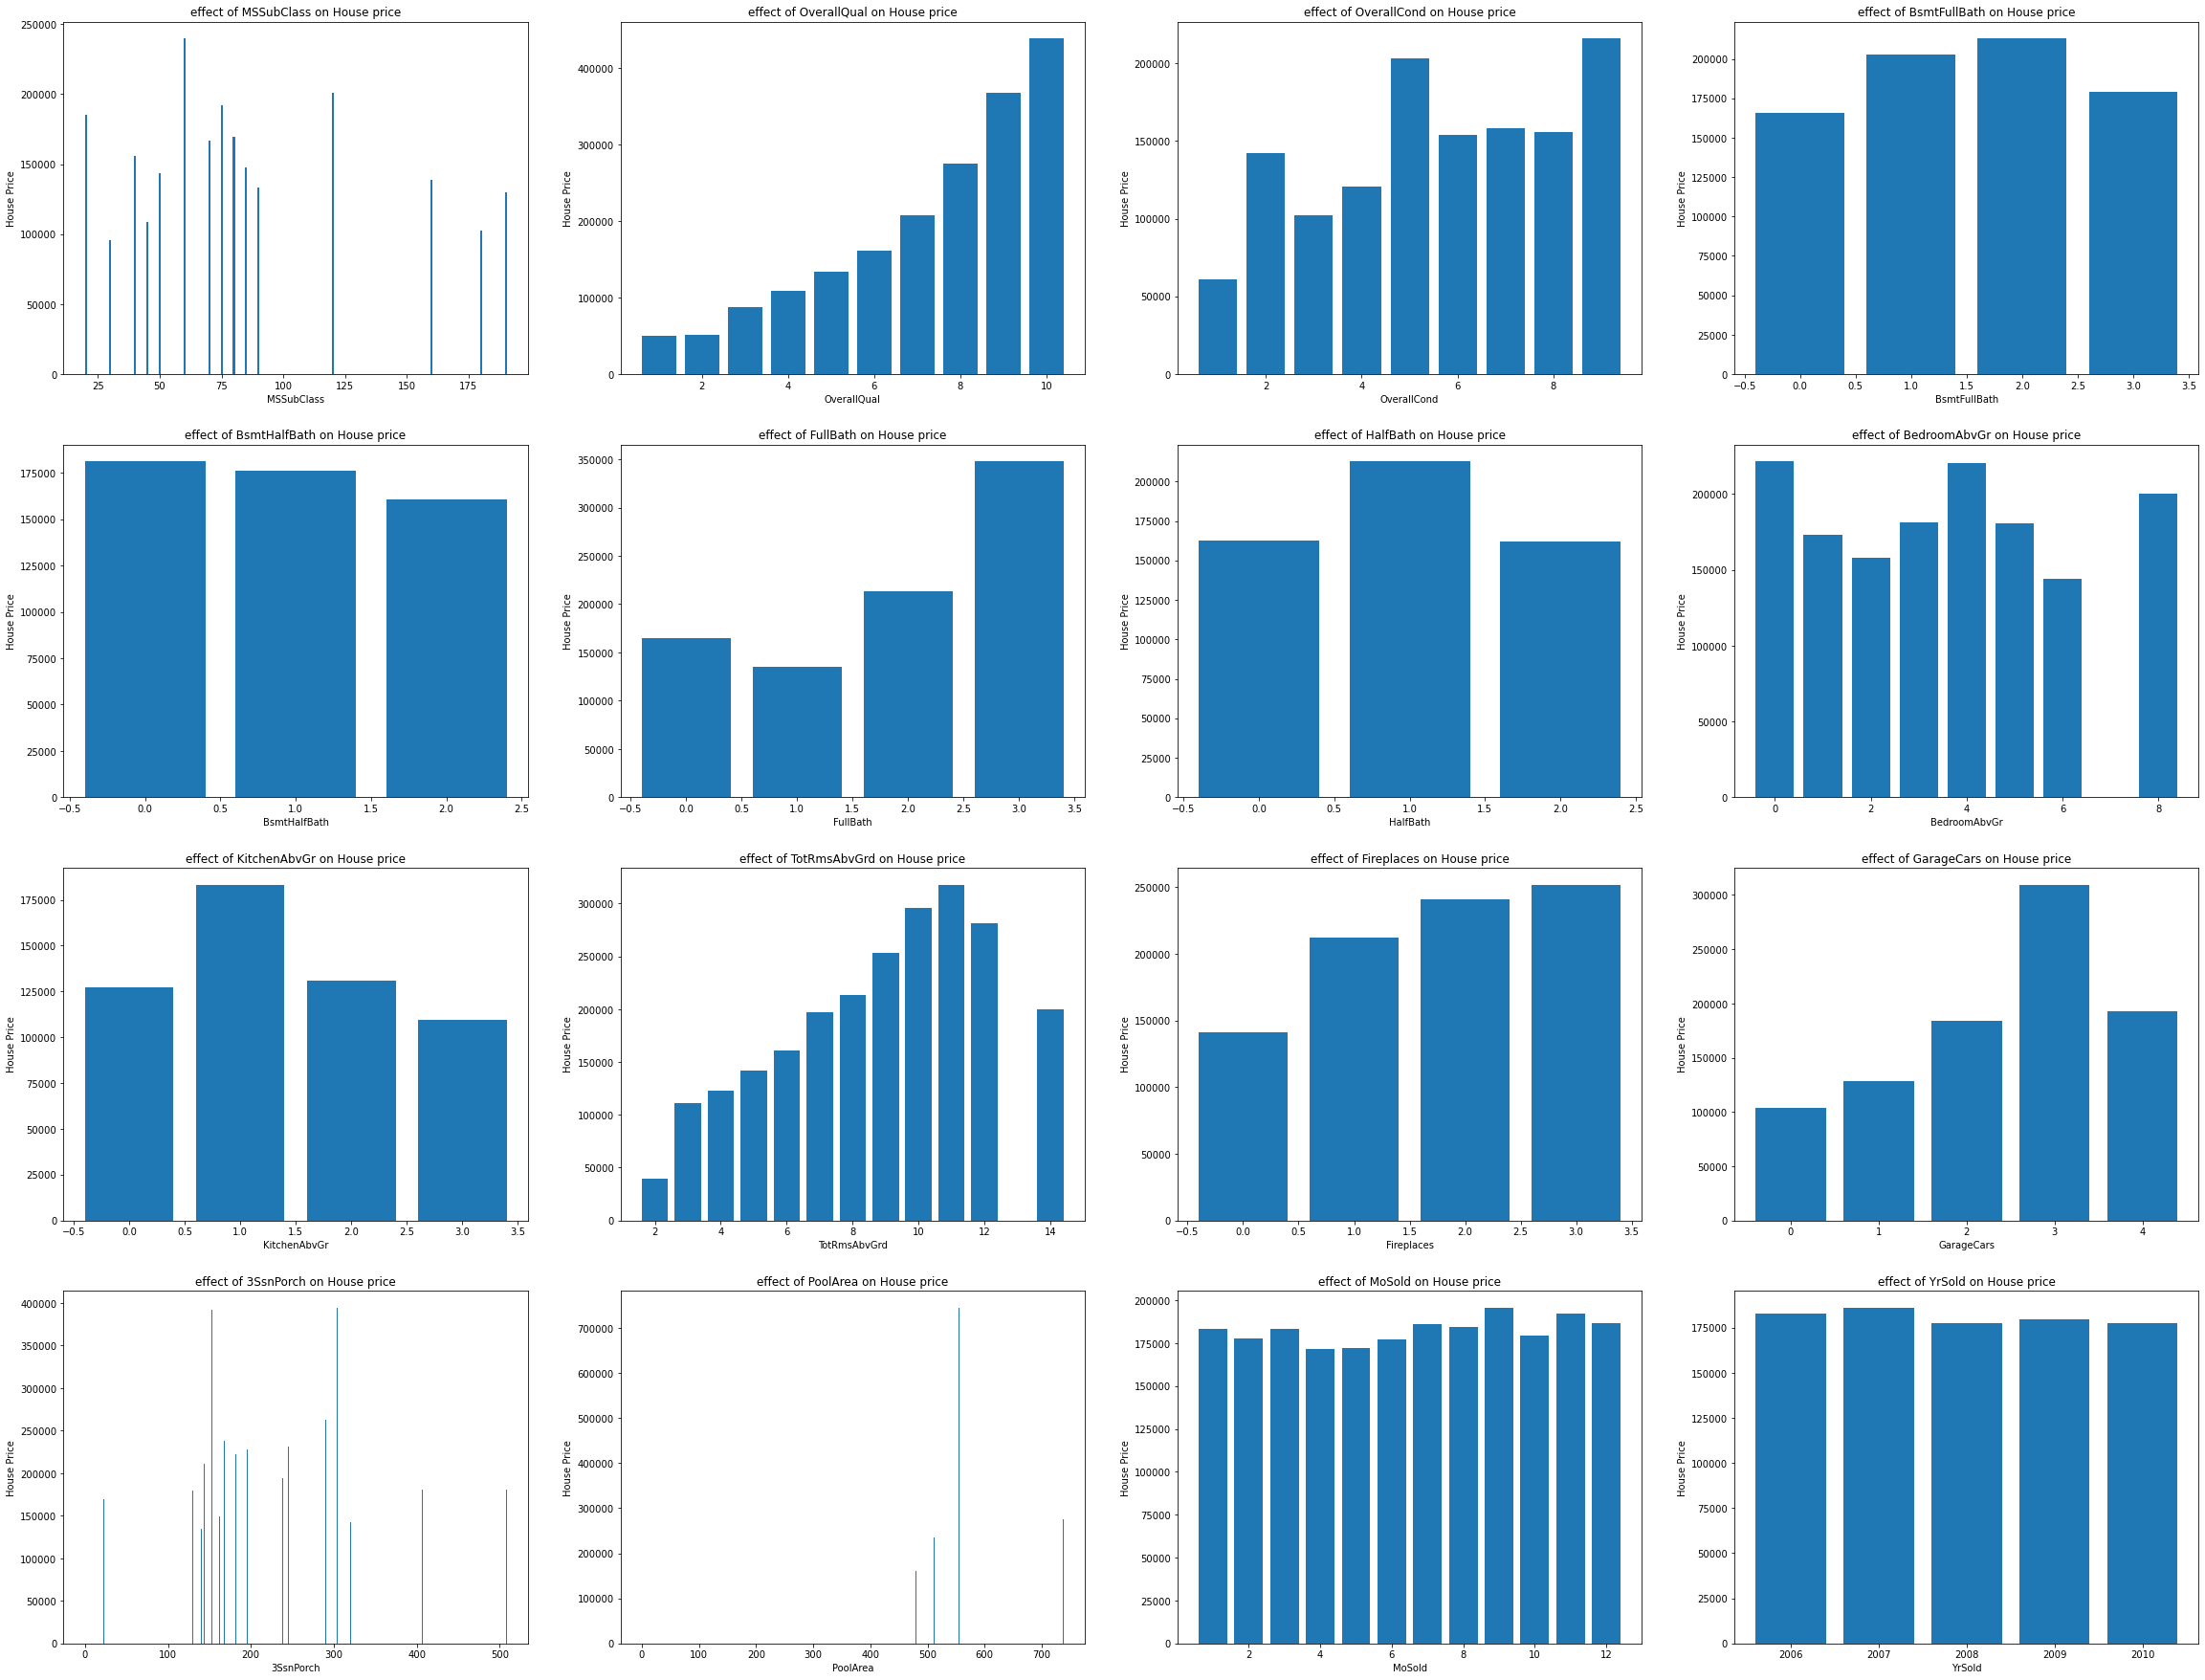

In [143]:
j=1
plt.figure(figsize=(40,80))
for column in discreteCols:
    plt.subplot(10,4,j)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending =False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f'effect of {column} on House price')
    plt.xlabel(column)
    plt.ylabel('House Price')    
    j+=1

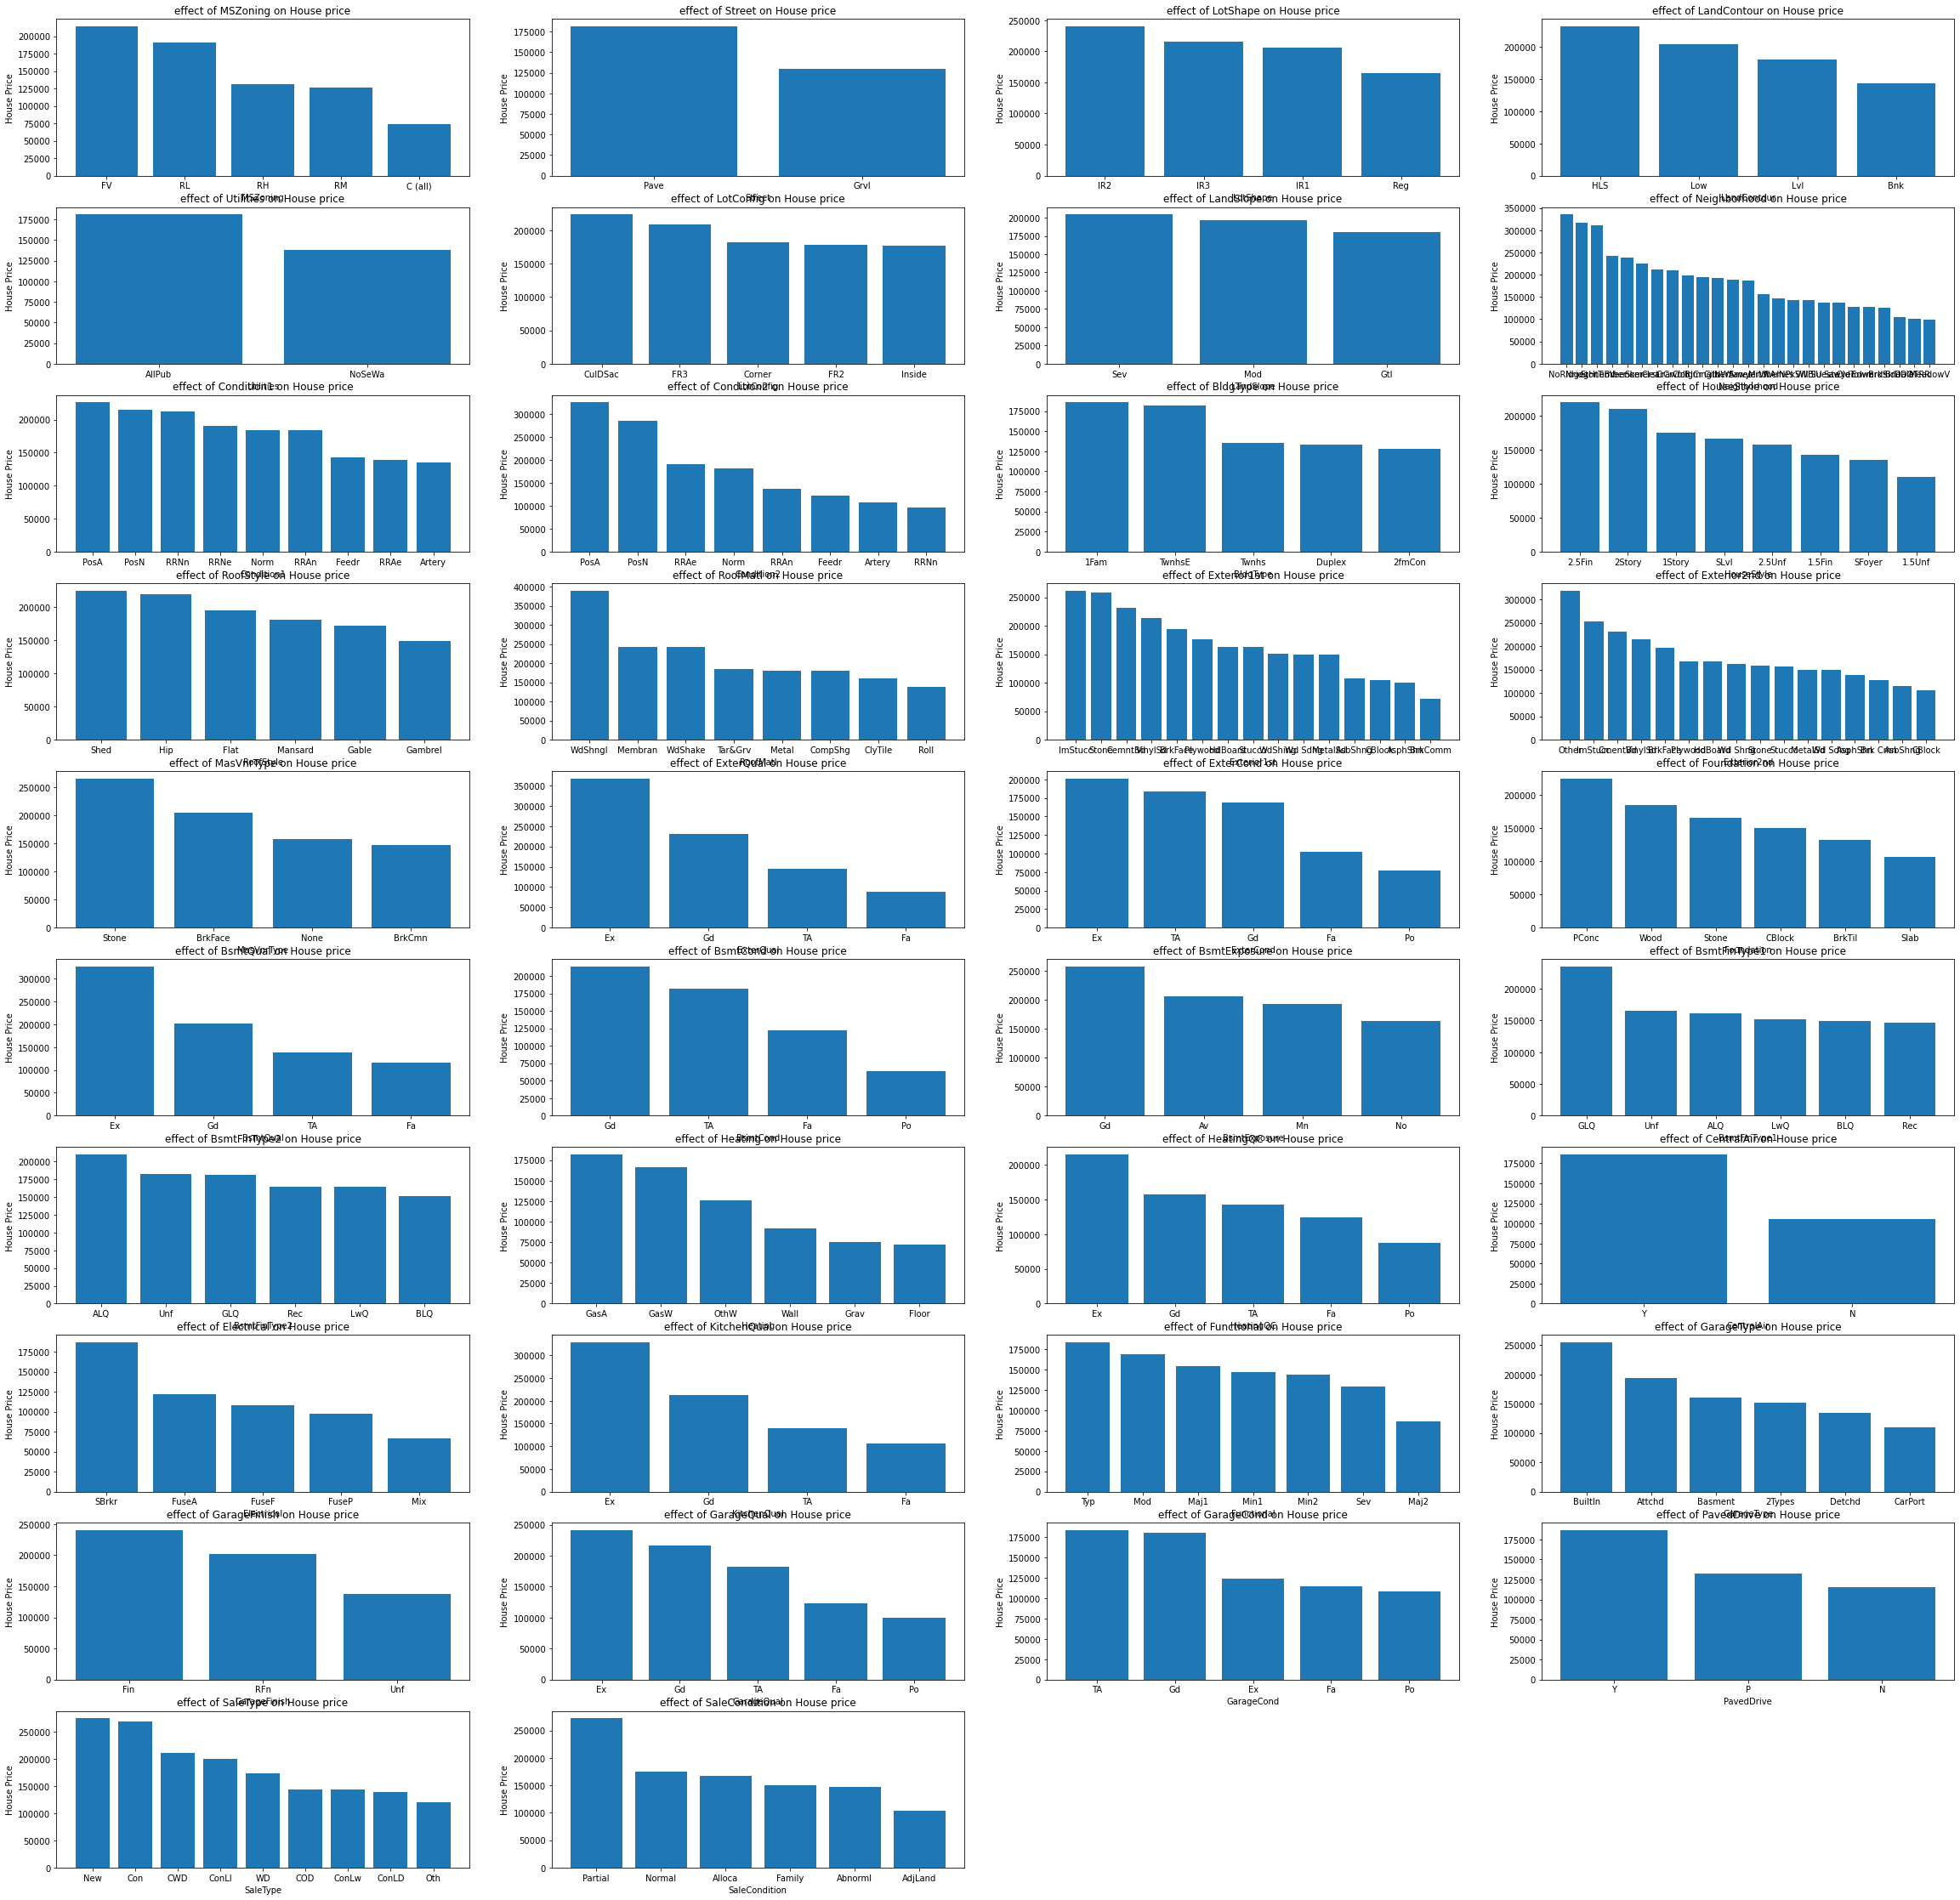

In [144]:
j=1
plt.figure(figsize=(40,40))
for column in objectlCol:
    plt.subplot(10,4,j)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF = pd.DataFrame(observationVal).sort_values(by='SalePrice',ascending =False)
    observationValDF.reset_index(inplace=True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f'effect of {column} on House price')
    plt.xlabel(column)
    plt.ylabel('House Price')    
    j+=1

In [145]:
# Handling outliers

In [146]:
contCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [147]:
#choosing method 1 - Outlier treatment by std deviation



#choosing col 1

train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [148]:
upper_limit = train['LotFrontage'].mean()+train['LotFrontage'].std()*3
lower_limit = train['LotFrontage'].mean()-train['LotFrontage'].std()*3

In [149]:
train[(train['LotFrontage']<=upper_limit) & (train['LotFrontage']>lower_limit)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [150]:
train.shape  

# 1460-1444      # 16 outliers

(1460, 75)

In [151]:
train.loc[train['LotFrontage']>upper_limit,'LotFrontage'] = upper_limit
train.loc[train['LotFrontage']<lower_limit,'LotFrontage'] = lower_limit


In [152]:
train[(train['LotFrontage']>upper_limit) & (train['LotFrontage']<lower_limit)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [153]:
# doing it in for loop
for column in contCols:
    upper_limit = train[column].mean()+train[column].std()*3
    lower_limit = train[column].mean()-train[column].std()*3

    train.loc[train[column]>upper_limit,column] = upper_limit
    train.loc[train[column]<lower_limit,column] = lower_limit


In [154]:
for column in contCols:
    print(train[(train[column]>upper_limit) & (train[column]<lower_limit)].shape[0])


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


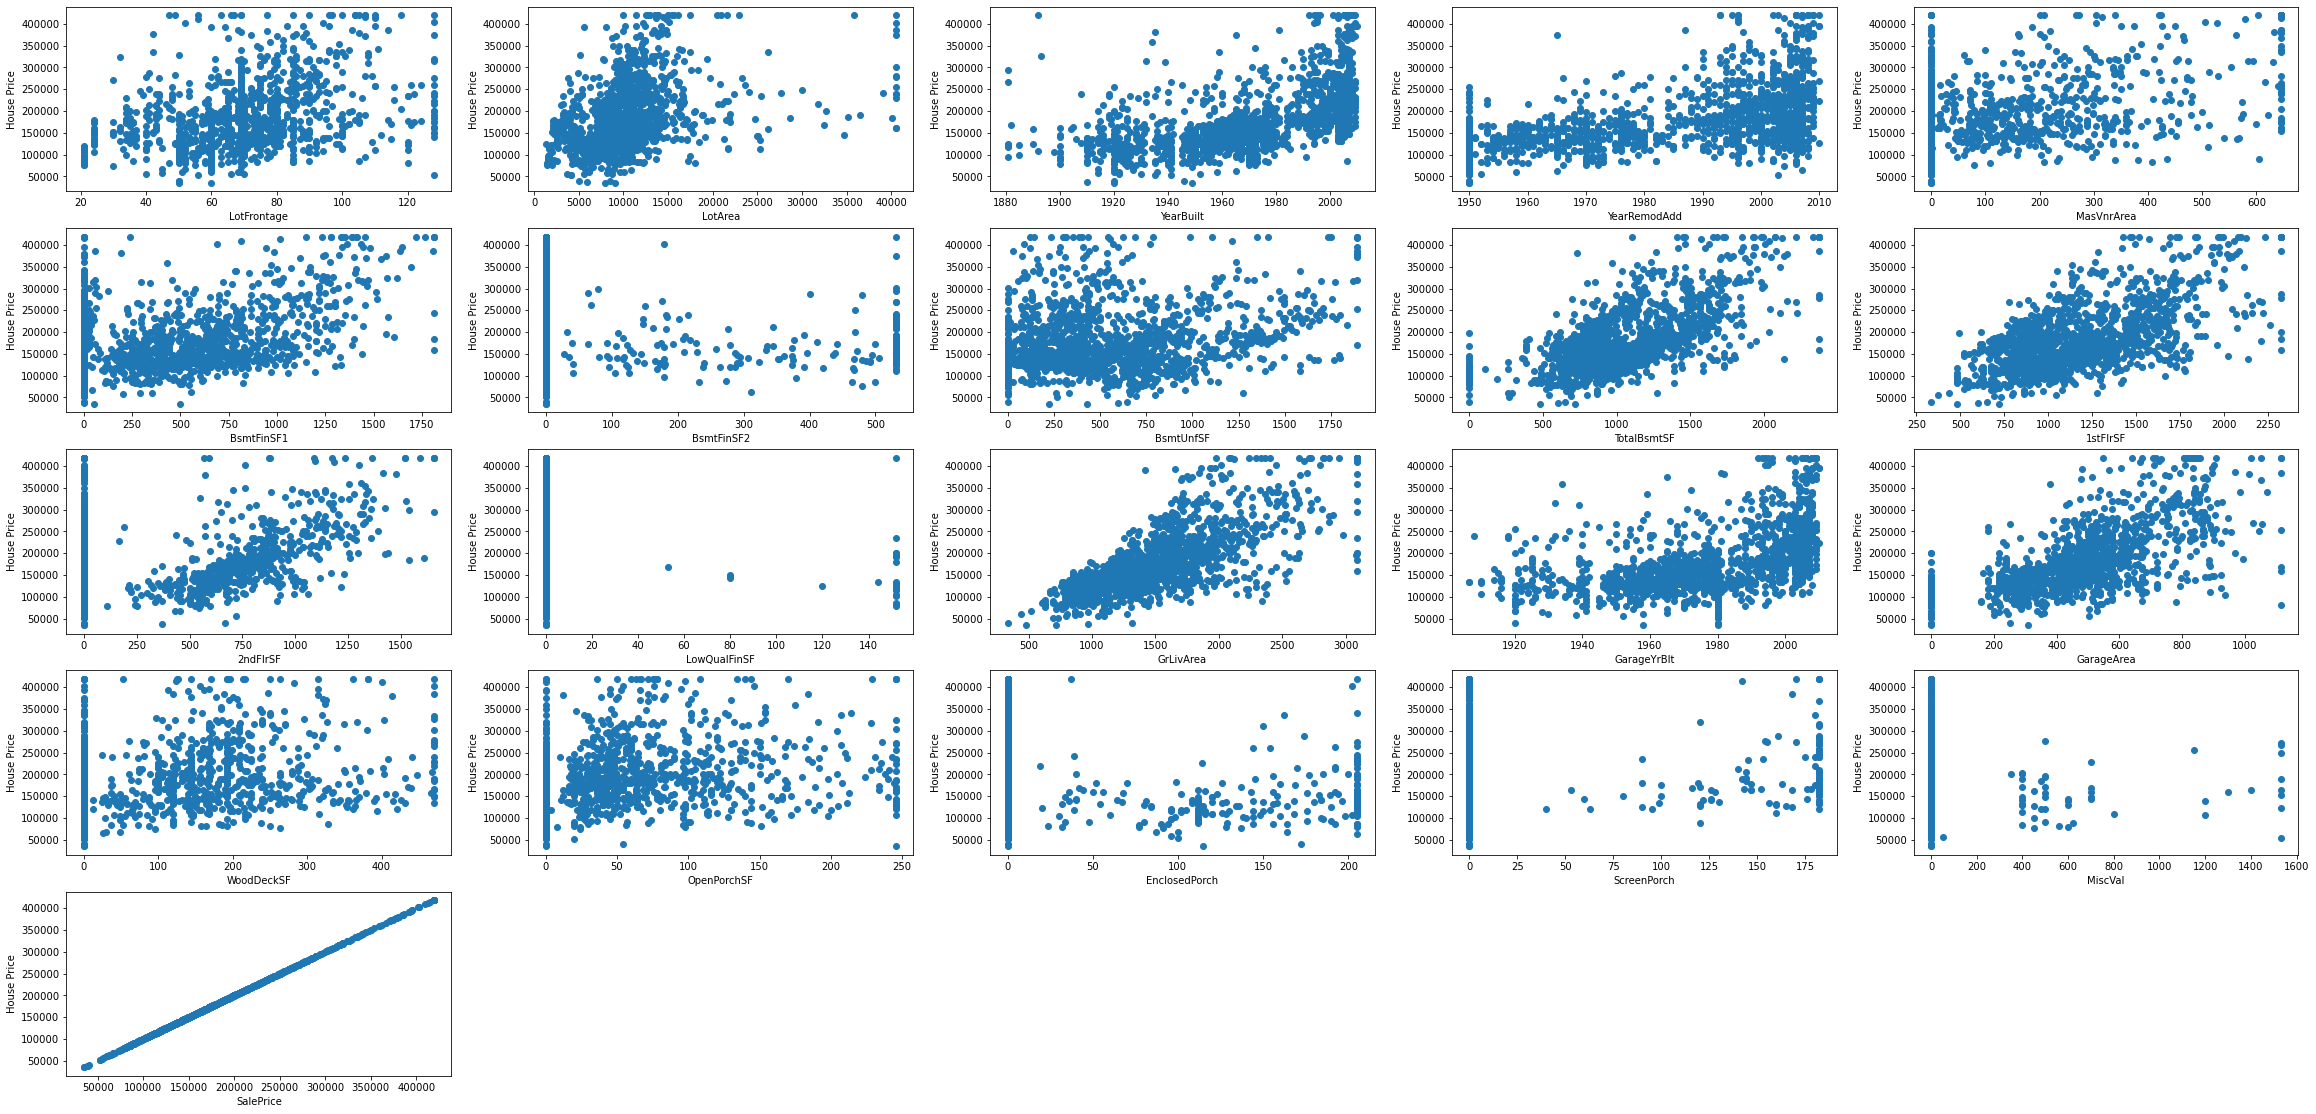

In [155]:
# plotting again
j=1
plt.figure(figsize=(40,40))
for column in contCols:
    plt.subplot(10,5,j)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('House Price')    
    j+=1

In [156]:
# Categorical Encoding

In [157]:
objectlCol

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [158]:
len(objectlCol)

38

In [159]:
objDF = train[objectlCol]

In [160]:
# one liner

from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)

#variable encoding 
fitobjDF = objDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))
fitobjDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [161]:
train[objectlCol] = fitobjDF

In [162]:
train[objectlCol]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [163]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,0.000000,0,0.0,0,0.000000,2,2008,8,4,208500.0
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,0.000000,0,0.0,0,0.000000,5,2007,8,4,181500.0
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,0.000000,0,0.0,0,0.000000,9,2008,8,4,223500.0
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,205.311555,0,0.0,0,0.000000,2,2006,8,0,140000.0
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,0.000000,0,0.0,0,0.000000,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917.0,1,3,3,0,4,0,...,0.000000,0,0.0,0,0.000000,8,2007,8,4,175000.0
1456,20,3,85.0,13175.0,1,3,3,0,4,0,...,0.000000,0,0.0,0,0.000000,2,2010,8,4,210000.0
1457,70,3,66.0,9042.0,1,3,3,0,4,0,...,0.000000,0,0.0,0,1531.858114,5,2010,8,4,266500.0
1458,20,3,68.0,9717.0,1,3,3,0,4,0,...,112.000000,0,0.0,0,0.000000,4,2010,8,4,142125.0


In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [165]:
defaultEncoder['LotShape'].transform(['Reg'])

array([3])

In [166]:
#Normalization after feature selection

## Feature Selection

 Correlation


In [167]:
corrDF = train.corr()
corrDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.400658,-0.279702,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.019256,-0.043825,-0.029757,0.008283,-0.018792,-0.013585,-0.021407,0.012464,-0.024940,-0.088248
MSZoning,0.035900,1.000000,-0.121719,-0.062106,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.120375,0.000362,0.012400,-0.003128,0.020830,-0.031496,-0.020628,0.097437,0.009494,-0.180951
LotFrontage,-0.400658,-0.121719,1.000000,0.455607,-0.044582,-0.148540,-0.033991,-0.000469,-0.183932,0.045463,...,-0.014103,0.072985,0.047740,0.093721,0.007932,0.012430,0.006756,-0.033825,0.066170,0.362129
LotArea,-0.279702,-0.062106,0.455607,1.000000,-0.127256,-0.261656,-0.154051,0.021477,-0.174378,0.336976,...,-0.023979,0.048513,0.086772,0.117284,0.053330,-0.004737,-0.034066,0.001833,0.045476,0.381589
Street,-0.024969,0.087654,-0.044582,-0.127256,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.024102,0.007473,-0.026098,0.004413,-0.078932,0.003690,-0.025043,0.014339,0.006064,0.043274


In [168]:
abs(corrDF['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.362129
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [169]:
corrCols = abs(corrDF['SalePrice']).sort_values(ascending=False)
corrCols[corrCols>0.4]

# taking only corr >4 cols


SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [170]:
final_columns = corrCols[corrCols>0.4].index
final_columns 
# do stdn normn on these cols only

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [171]:
updated_train = train[final_columns]
updated_train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [172]:
y = updated_train['SalePrice']
X = updated_train.drop('SalePrice',axis = 1)


In [173]:

# do steps 



# scale down (x)
# check if bell curve qqplt
# if not normalise/stdze

In [174]:
 #steps


from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)  







 #loaded

In [176]:
# X_train

In [177]:
# y_train

In [178]:
# X_test


In [179]:
# y_test

In [180]:
# scaling X using std scalar
sc_X = StandardScaler()


# sc_X.fit_transform(X_train)
# sc_X.transform(X_test)


X_train = pd.DataFrame(sc_X.fit_transform(X_train))
X_test = pd.DataFrame(sc_X.transform(X_test))

In [86]:
# just showing what is stored in the object at the time of fit

#mean of X train
sc_X.mean_

array([6.12818004e+00, 1.52107208e+03, 1.78375734e+00, 4.76669456e+02,
       1.05340936e+03, 2.54500978e+00, 1.16500110e+03, 2.26712329e+00,
       2.34442270e+00, 1.58219178e+00, 1.22113503e+00, 1.97100552e+03,
       1.98475734e+03, 6.54500978e+00, 1.97875362e+03, 6.13502935e-01,
       1.02144730e+02, 1.52446184e+00, 1.40704501e+00])

In [87]:
sc_X.var_

array([1.87887320e+00, 2.44348028e+05, 5.33473945e-01, 4.27274914e+04,
       1.67746051e+05, 4.73023043e-01, 1.33558857e+05, 7.55455325e-01,
       6.66108815e-01, 2.96082085e-01, 6.65385013e-01, 9.42609476e+02,
       4.30021350e+02, 2.65501913e+00, 5.81656620e+02, 4.23027064e-01,
       2.57504292e+04, 2.99304154e+00, 5.42729233e-01])

In [88]:
#std deviattion of X train
np.sqrt(sc_X.var_)

array([  1.37071996, 494.31571662,   0.73039301, 206.70629257,
       409.56812788,   0.68776671, 365.45705177,   0.86916933,
         0.8161549 ,   0.54413425,   0.81571135,  30.7019458 ,
        20.73695615,   1.62942294,  24.11755833,   0.65040531,
       160.46940265,   1.73004091,   0.73670159])

In [182]:
#Prediction 

#1.fitting

#creating object
lr = LinearRegression()

#train the model using the train set
lr.fit(X_train, y_train)        


LinearRegression()

In [185]:
#2. prediction
y_pred = lr.predict(X_test)

In [187]:
# mse (yactual(test),ypredicted)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)




### note that this is done by scaling only x ,y is not scaled

685260454.2633597

In [189]:
#train accuracy
lr.score(X_train,y_train)

0.8371734316221418

In [188]:
#test accuracy
lr.score(X_test,y_test)

0.8770537572628974

## test acc  > train acc    ---> (optimal model)
## else                     ---> (over fitting)

### test acc should be > train

In [202]:
# scaling y using std scalar
sc_y = StandardScaler()


# sc_y.fit_transform(y_train)
# sc_y.transform(y_test)


y_train = pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test = pd.DataFrame(sc_y.transform(np.array(y_test).reshape(-1,1)))

In [204]:
y_train.head()

,0
0,-0.588470
1,-0.457411
2,0.715223
3,-0.333249
4,-0.140110


In [205]:
#Prediction



#1.fitting

#creating object (full scaled)
lr_scaled = LinearRegression()

#train the model using the train set
lr_scaled.fit(X_train, y_train)  

LinearRegression()

In [208]:
#2. prediction
y_pred_scaled = lr_scaled.predict(X_test)

In [209]:
# mse (yactual(test),ypredicted)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_scaled)


0.13041961237661545

In [211]:
# train accuracy        scaled
lr_scaled.score(X_train,y_train)

0.8371734316221419

In [212]:
# Test accuarcy      scaled
lr_scaled.score(X_test,y_test)

0.8770537572628974